# KMeans EDA on Telecom Churn Data

By _Alex Vaillant_

## Research Question:

_"To what extent can you accurately group customers into clusters based on customer cost, usage, internet service, contract type, and income and explore how many clusters are best?"_

### Show Python Version

In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)

### Import necessary libraries

In [2]:
import pandas as pd
from scipy.cluster.vq import kmeans, kmeans2
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import random

### Set the random seed to get the same results every run

In [3]:
random.seed(1234)

### Import the original dataset

In [4]:
url = "C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Clustering/KMeans EDA on Telecom Churn Data/Raw Datasets/churn_clean.csv"
churn_data = pd.read_csv(url)
churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Index the dataset to remove unnecessary columns and split out the Churn column for future analysis

In [5]:
churn_indexed = churn_data[['Churn','MonthlyCharge','Bandwidth_GB_Year','Contract','InternetService','Income']] # initial index
churn_yes = churn_indexed['Churn'] # split out the Churn column for future analysis
my_cols = set(churn_indexed.columns)
my_cols.remove('Churn')
churn_indexed = churn_indexed[my_cols] # removed all unnecessary columns

### Create dummy columns for Categorical Variables by using .get_dummies() from pandas

In [6]:
churn_dummy = pd.get_dummies(data = churn_indexed)

### Normalize the dataset and create the final dataframe to use for analysis

In [7]:
new_cols = set(churn_dummy.columns) # extract the column names
scaler = MinMaxScaler() # instantiate the MinMaxScaler() function
scaler.fit(churn_dummy) # fit the MinMaxScaler to our data
churn_normed = scaler.transform(churn_dummy) # transform our data 
churn_df = pd.DataFrame(churn_normed, columns = new_cols) # create usable dataframe and add in column names

### Describe the output dataset

In [8]:
churn_df.describe()

,InternetService_None,MonthlyCharge,Income,Contract_Month-to-month,Bandwidth_GB_Year,Contract_Two Year,InternetService_DSL,Contract_One year,InternetService_Fiber Optic
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.440790,0.152612,0.462176,0.545600,0.210200,0.244200,0.346300,0.440800,0.212900
std,0.204314,0.109069,0.312030,0.497941,0.407471,0.429633,0.475814,0.496508,0.409378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285469,0.073007,0.154347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.416335,0.126945,0.446069,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.574531,0.204591,0.775420,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Export the cleaned, usable dataset

In [9]:
churn_df.to_csv("C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Clustering/KMeans EDA on Telecom Churn Data/Cleansed Datasets/prepped_data.csv",index=False,header=True)

### Create a For Loop to test different numbers of clusters in the data

In [10]:
num_clusters = range(2,7)
distortions = []
for i in num_clusters:
    cluster_centers,distortion = kmeans(churn_df, i)
    distortions.append(distortion)

### Create a new dataframe to plot the distortion of each number of clusters

<AxesSubplot:xlabel='num_clusters', ylabel='distortions'>

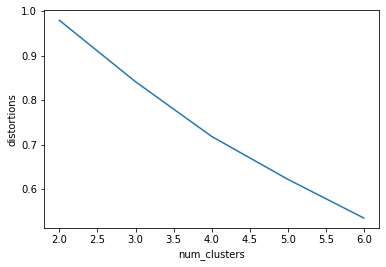

In [11]:
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})
sns.lineplot(x='num_clusters',y='distortions',data = elbow_plot)

### Decided to use k = 4 as there is a VERY slightly, visible elbow there. Use kmeans2 to plot the new cluster and get the labels

In [12]:
centroids, labels = kmeans2(churn_df, 4, minit='points')

### Add our Churn column and the new labels into our dataframe for further analysis

In [13]:
churn_df['Churn']=churn_yes
churn_df['labels']=labels

### Count the amount in each of our 4 clusters

In [14]:
churn_df['labels'].value_counts()

1    3316
2    3037
3    2442
0    1205
Name: labels, dtype: int64

### Export the final dataset for further analysis

In [15]:
churn_df.to_csv("C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Clustering/KMeans EDA on Telecom Churn Data/Cleansed Datasets/final_dataset_forfutheranalysis.csv",index=False, header=True)